# Project Intro

## Goals:

1. Investigate top paying rolls and skills in the data science industry
1. Use Python to explore a real-live dataset on job postings
1. For job-seekers: use these insights to help find the best job opportunities

## Final Deliverables:

- Create Jupyter Notebooks (to showcase core Python skills and code used)
- Create a summary page to capture findings
- Share project on GitHub and LinkedIn

## Questions to Answer?

1. What are the most demanded skills for the top 3 most popular data roles?
1. How are in-demand skills trending for Aata Analysts?
1. How well do jobs and skills pay for Data Analysts?
1. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Pay)

#### I will be focusing on Data Analyst roles in the United States for this project

# Exploratory Data Analysis

In [8]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for United States Data Analyst roles

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [7]:
df_DA_US['job_location'].value_counts().head(10).to_frame()

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


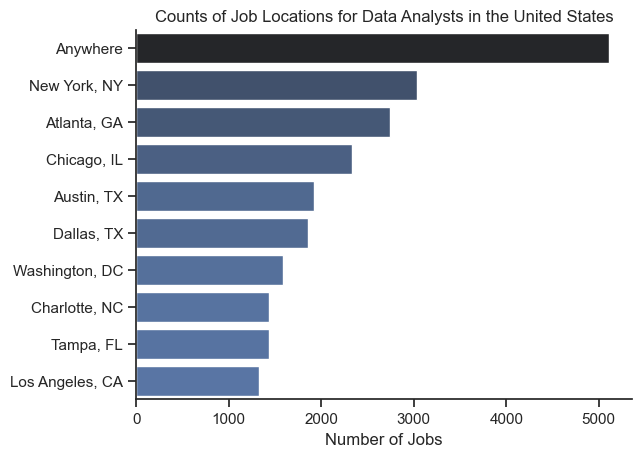

In [15]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

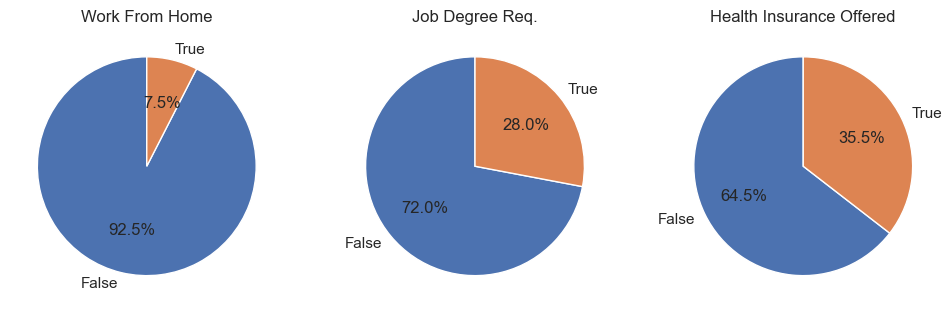

In [17]:
dict_columns={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

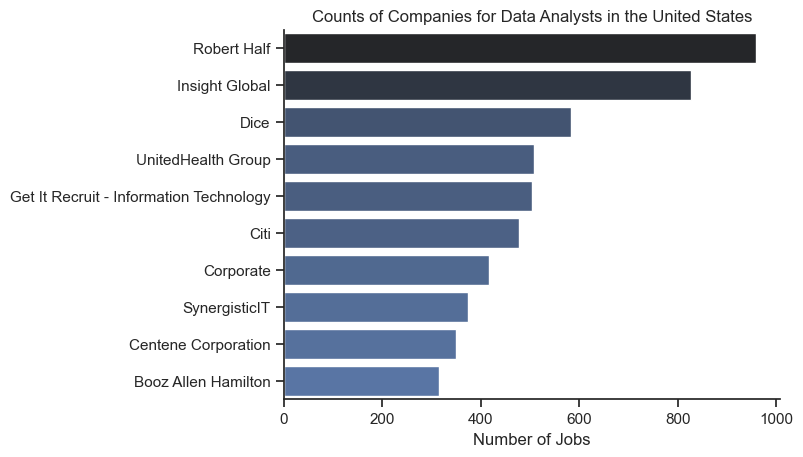

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analysts in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()